In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [72]:
auspop_df=pd.read_csv("Resources/AUSPOP.csv")
dfwpop_df=pd.read_csv("Resources/DFWPOP.csv")
elppop_df=pd.read_csv("Resources/ELPPOP.csv")
htnpop_df=pd.read_csv("Resources/HTNPOP.csv")
mclpop_df=pd.read_csv("Resources/MCLPOP.csv")
satpop_df=pd.read_csv("Resources/SATPOP.csv")

In [73]:
population_df = pd.merge(auspop_df,dfwpop_df, on="DATE",how="outer")
population_df = pd.merge(population_df,elppop_df, on="DATE",how="outer")
population_df = pd.merge(population_df,htnpop_df, on="DATE",how="outer")
population_df = pd.merge(population_df,mclpop_df, on="DATE",how="outer")
population_df = pd.merge(population_df,satpop_df, on="DATE",how="outer")
population_df.head()

,DATE,AUSPOP,DFWPOP,ELPPOP,HTNPOP,MCLPOP,SATPOP
0,2000-01-01,1265.715,5196.188,680.942,4739.414,573.398,1719.262
1,2001-01-01,1324.426,5354.623,684.780,4851.189,588.533,1743.796
2,2002-01-01,1353.176,5476.578,688.771,4978.638,607.449,1777.397
3,2003-01-01,1382.693,5582.033,694.672,5084.017,627.164,1808.267
4,2004-01-01,1418.999,5689.982,702.433,5190.444,646.523,1843.927


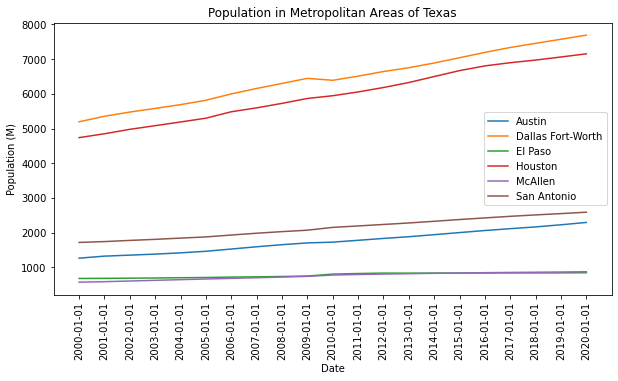

In [100]:
plt.figure(figsize=(10,5))
plt.plot(population_df['DATE'],population_df['AUSPOP'],label='Austin')
plt.plot(population_df['DATE'],population_df['DFWPOP'],label='Dallas Fort-Worth')
plt.plot(population_df['DATE'],population_df['ELPPOP'],label='El Paso')
plt.plot(population_df['DATE'],population_df['HTNPOP'],label='Houston')
plt.plot(population_df['DATE'],population_df['MCLPOP'],label='McAllen')
plt.plot(population_df['DATE'],population_df['SATPOP'],label='San Antonio')

plt.legend(loc='best')

plt.title("Population in Metropolitan Areas of Texas")
plt.xlabel("Date")
plt.ylabel("Population (M)")

plt.xticks(rotation="vertical")
plt.savefig('Results/MetroPopulation.png')
plt.show()

In [75]:
listings_df=pd.read_csv("Resources/metro_listings.csv")
listings_df.set_index('RegionName', inplace=True)
texas_listings_df= listings_df[listings_df['StateName'] == 'TX']
texas_listings_df = texas_listings_df.drop(["RegionID", "SizeRank", "RegionType","StateName"], axis=1)
texas_listings_df
tx_list_df = texas_listings_df.T
tx_list_df.index.name = "DATE"
tx_list_df.reset_index(inplace=True)
tx_list_df.head()

RegionName,DATE,"Dallas-Fort Worth, TX","Houston, TX","San Antonio, TX","Austin, TX","El Paso, TX","McAllen, TX"
0,1/31/2018,24283.0,32985.0,11343.0,7955.0,4534.0,2150.0
1,2/28/2018,23203.0,32147.0,11205.0,7577.0,4565.0,2160.0
2,3/31/2018,24345.0,33766.0,11885.0,8158.0,4622.0,2225.0
3,4/30/2018,26749.0,35826.0,12721.0,9160.0,4627.0,2258.0
4,5/31/2018,29538.0,38655.0,13431.0,10295.0,4551.0,2302.0


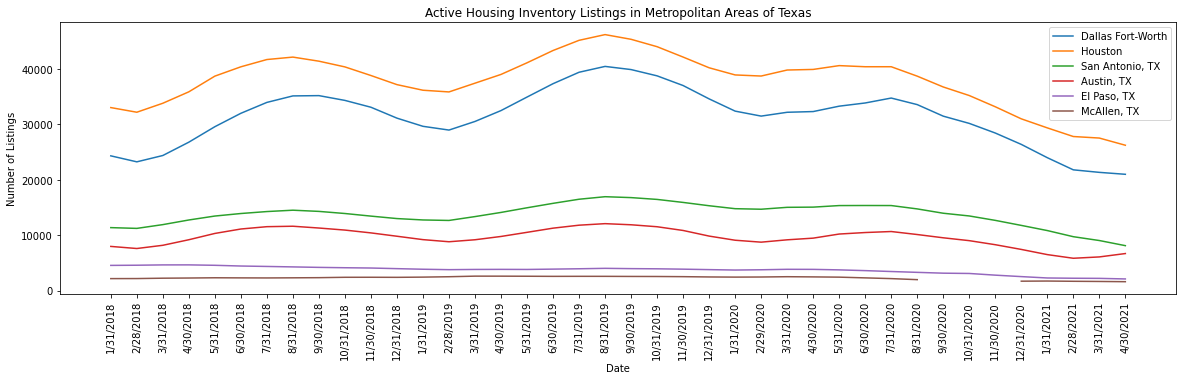

In [99]:
plt.figure(figsize=(20,5))
plt.plot(tx_list_df['DATE'],tx_list_df['Dallas-Fort Worth, TX'],label='Dallas Fort-Worth')
plt.plot(tx_list_df['DATE'],tx_list_df['Houston, TX'],label='Houston')
plt.plot(tx_list_df['DATE'],tx_list_df['San Antonio, TX'],label='San Antonio, TX')
plt.plot(tx_list_df['DATE'],tx_list_df['Austin, TX'],label='Austin, TX')
plt.plot(tx_list_df['DATE'],tx_list_df['El Paso, TX'],label='El Paso, TX')
plt.plot(tx_list_df['DATE'],tx_list_df['McAllen, TX'],label='McAllen, TX')

plt.legend(loc='best')

plt.title("Active Housing Inventory Listings in Metropolitan Areas of Texas")
plt.xlabel("Date")
plt.ylabel("Number of Listings")

plt.xticks(rotation="vertical")
plt.savefig('Results/HistoricalListings.png')
plt.show()

In [91]:
prices_df=pd.read_csv("Resources/metro_median_value.csv")
prices_df.set_index('RegionName', inplace=True)
#prices_df['DATE']=pd.to_datetime(prices_df['DATE'],infer_datetime_format=True)
#prices_df.head()
texas_prices_df= prices_df[prices_df['StateName'] == 'TX']
texas_prices_df = texas_prices_df.drop(["RegionID", "SizeRank", "RegionType","StateName"], axis=1)
tx_prices_df = texas_prices_df.T
tx_prices_df.index.name = "DATE"
tx_prices_df.reset_index(inplace=True)
tx_prices_df['DATE']=pd.to_datetime(tx_prices_df['DATE'],infer_datetime_format=True)
tx_prices_filt_df = tx_prices_df[['DATE','Dallas-Fort Worth, TX','Houston, TX','San Antonio, TX','Austin, TX','El Paso, TX','McAllen, TX']]
tx_prices_filt_df.head()

RegionName,DATE,"Dallas-Fort Worth, TX","Houston, TX","San Antonio, TX","Austin, TX","El Paso, TX","McAllen, TX"
0,1996-01-31,112230.0,109810.0,107511.0,170740.0,86922.0,NaN
1,1996-02-29,112293.0,109885.0,107463.0,169874.0,86835.0,NaN
2,1996-03-31,112454.0,109894.0,107415.0,168631.0,86814.0,NaN
3,1996-04-30,112775.0,110042.0,107379.0,166862.0,86784.0,NaN
4,1996-05-31,113120.0,110182.0,107290.0,166396.0,86883.0,NaN


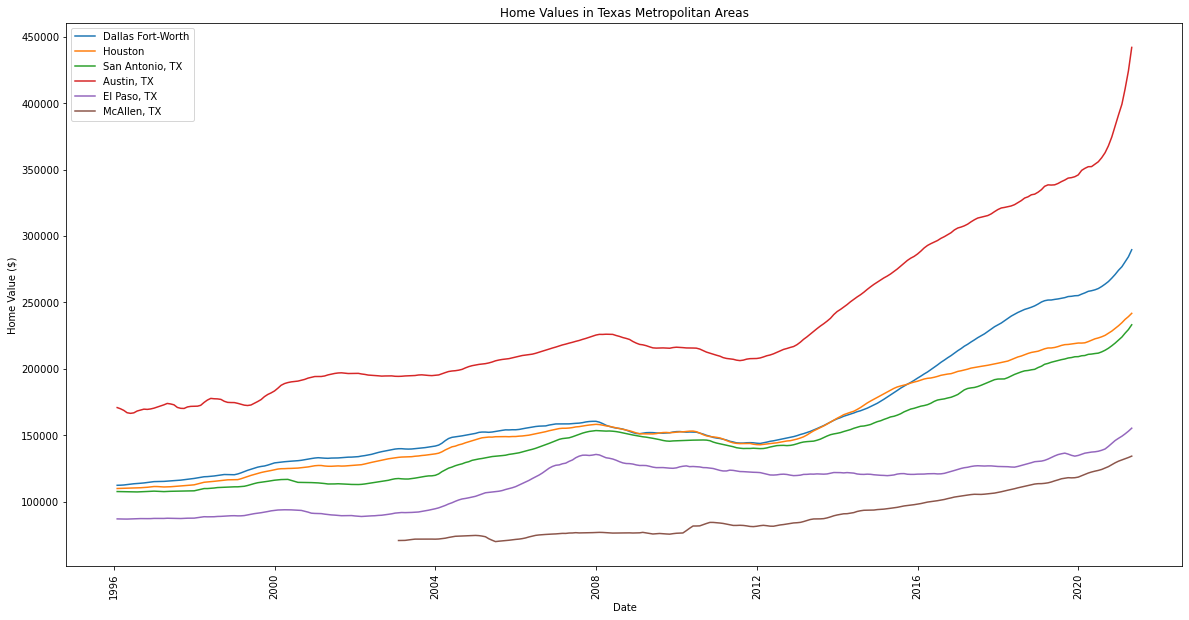

In [98]:
plt.figure(figsize=(20,10))
plt.plot(tx_prices_filt_df['DATE'],tx_prices_filt_df['Dallas-Fort Worth, TX'],label='Dallas Fort-Worth')
plt.plot(tx_prices_filt_df['DATE'],tx_prices_filt_df['Houston, TX'],label='Houston')
plt.plot(tx_prices_filt_df['DATE'],tx_prices_filt_df['San Antonio, TX'],label='San Antonio, TX')
plt.plot(tx_prices_filt_df['DATE'],tx_prices_filt_df['Austin, TX'],label='Austin, TX')
plt.plot(tx_prices_filt_df['DATE'],tx_prices_filt_df['El Paso, TX'],label='El Paso, TX')
plt.plot(tx_prices_filt_df['DATE'],tx_prices_filt_df['McAllen, TX'],label='McAllen, TX')

plt.legend(loc='best')

plt.title("Home Values in Texas Metropolitan Areas")
plt.xlabel("Date")
plt.ylabel("Home Value ($)")

plt.xticks(rotation="vertical")
plt.savefig('Results/MedianHousingPrice.png')
plt.show()

In [79]:
#pricesList_df = pd.merge(tx_list_df,tx_prices_df,on="DATE",how="left")
#pricesList_df